In [1]:
import numpy as np
from scipy import optimize
from casadi import *
import matplotlib.pyplot as plt

Stella MIRRI,  Jack EVANS
# PROJET 1 :   Rangement d’un tuyau de jardin

***

 On modélise la position du tuyau comme une courbe de longueur L dans le plan. On représente cette
 courbe par $N+1$ points $$(xi, yi) \qquad (i = 0, ... N)$$ uniformément espacés d’une longueur $ds = \frac{L}{N}$. 
 
 En introduisant l’angle $\theta_i$ de la courbe avec l’origine au point $(xi,\ yi)$, on obtient
 $$x_{i+1}- xi =ds \ cos \theta_i$$
 $$y_{i+1}- yi =ds \ sin \theta_i$$
 $$\qquad (i=0,... N) \qquad(1)$$
 où les variations de $\theta_i$ sont limitées, du fait de la courbure maximale $\alpha > 0$ du tuyau, via la condition
 $$\theta_{i+1}-\theta_i \in [ - \alpha ds, \alpha ds] \qquad (2)$$

 On suppose que le robinet d’eau est situé au point $(0,\ 1)$ tandis que le parterre de fleur doit être arrosé
 au point $(\frac{L}{2},\ 0)$ et l’on impose
 $$x_0 = \theta_0 =y_N = \theta_{N-1}=0 \qquad y_0=1 \qquad (3)$$
 On cherche alors à minimiser la fonction
$$K(x_N-\frac{L}{2})^2 + ds\sum_{i=0}^N{|y_i|} \qquad (4)$$
 où $K \gg ds$ est un paramètre constant.

## 1) Etude du problème d'optimisation


1. Interpréter le cout $(4)$. Que cherche-t-on a minimiser?

***
**REPONSE**

On cherche a minimiser : 
- d'une part   $(x_N-\frac{L}{2})^2$   pour faire avoir   $x_N=\frac{L}{2}$   ou plutôt avoir une valeur *suffisamment proche* pour faire l'approximation en pratique (d'où le $K$ grand pour donner plus de poids a ce terme).
- d'autre part   $ds\sum_{i=0}^N{|y_i|}=\frac{L}{N}\sum_{i=0}^N{|y_i|}$   pour que le tuyau soit le "plus proche possible" de l'axe des abscisses $y=0$ (faire 2 dessins)
***

2. Pourquoi n’a-t-on pas plutôt imposé la contrainte $x_N = \frac{L}{2}$ ? (Indice : on pourra considérer la valeur initiale qu’il faudrait alors fournir au solveur pour la résolution numérique d’un tel problème.)

***
**REPONSE**


***

3. Quelle difficulté peut présenter le coût $(4)$ numériquement ?

***
**REPONSE**

La valeur absolue n'est pas différenciable en $0$, et a priori les $y_i$ sont proches de $y=0$ donc on sera limité.es dans le choix d'algorithme
***

4. Justifier que minimiser $(4)$ est équivalent à minimiser
$$K(x_N − \frac{L}{2})^2+ ds\sum{w_i}$$
t.q. $w_i \geq y_i$ et $w_i \geq −y_i , i = 0, . . . , N (5)$
où $w_i (i = 0, . . . , N )$ sont de nouvelles variables scalaires. Quel est l’avantage de cette réécriture ? On la retiendra pour la suite du sujet.

***
**REPONSE**

On a :

***

5. Formuler le problème d’optimisation à résoudre sous la forme
$$min_{(c_{eq}(z)=0 , \ c_{ineq}(z) \leq 0)} f(z) \qquad (6)$$
On précisera les variables de décision $z$, leur nombre $n$, les contraintes $c_{eq}$ et $c_{ineq}$ ainsi que la fonction objectif $f$ à minimiser

***
**REPONSE**

On pose
$$f(z) = K(x_N − \frac{L}{2})^2+ ds\sum_{i=0}^N{w_i}$$
Ou $z = (x_0,...x_N,y_0,...,y_N,\theta_0,...,\theta_{N-1},w_0,...,w_N)$ contient $n=4N+3$ variables

Les contraintes d'égalité sont :

- aux extrémités : 
$$c_{eq,1}(z) = x_0, \qquad c_{eq,2}(z) = y_0-1 \qquad c_{eq,3}(z) = \theta_0, \qquad c_{eq,4}(z) = \theta_{N-1}, \qquad c_{eq,5}(z) = y_N$$
- et le long du tuyau :
$$c_{eq,6,i}(z) = x_{i+1}-x_i - ds\ cos\theta_i, \qquad c_{eq,7,i}(z) = y_{i+1}-y_i - ds\ sin\theta_i, \qquad i=0,...,N-1$$

Les contraintes d'inégalité sont :
$$c_{ineq,1,i}(z) = y_i-w_i, \qquad c_{ineq,2,i}(z) = -y_i-w_i \qquad i=0,...,N$$
$$c_{ineq,3,i}(z) = -\alpha ds -(\theta_{i+1}-\theta_i), \qquad c_{ineq,4,i}(z) = -\alpha ds +(\theta_{i+1}-\theta_i), \qquad i=0,...,N-2$$
***

## 2) Etude et résolution numériques

6.  Quelles méthodes de résolution peuvent être envisagées pour ce problème?

***
**REPONSE**

On peut utiliser une méthode de programmation quadratique séquentielle, adaptée aux problèmes d'optimisation sous contraintes.
Pour cela, la méthode slsqp de optimize.minimize de la librairie scipy.optimize.
***

7.  Développer un algorithme de résolution pour les valeurs numériques suivantes :

 $\qquad L=10, N=50, K=1 $ et $ \alpha=1 \qquad (7)$

 en utilisant comme courbe initiale la droite reliant le point $(1, \ 0)$ à un point de l’axe des abscisses.

***
**REPONSE**


***

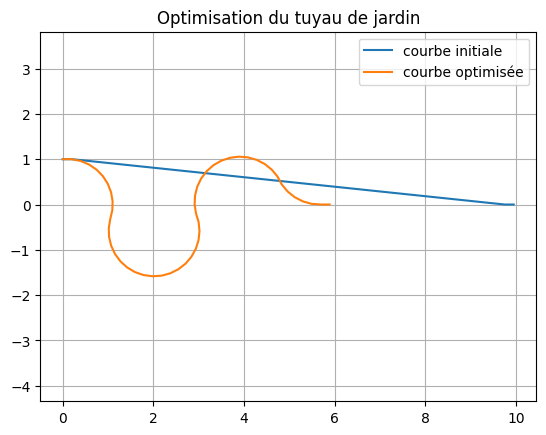

In [2]:
K = 1
N = 50
L = 10
ds = L/N
alpha = 1



x0 = np.zeros(N+1)
y0 = np.zeros(N+1)

y0[0] = 1
y0[N] = 0
x0[0] = 0
x0[N] = np.sqrt((L-2*ds)**2 -1) + 2*ds
x0[1:N] = np.linspace(ds, np.sqrt((L-2*ds)**2 -1) + ds, N-1)
y0[1:N] = np.linspace(1, 0, N-1)

theta0 = np.zeros(N)
theta0[0] = 0
theta0[-1] = 0
for i in range(1, N-1):
    theta0[i] = -np.arcsin(1 / (L - 2*ds))


# x0 = np.linspace(0, np.sqrt(L**2 -1), N+1)
# y0 = np.linspace(1, 0, N+1)

z0 = np.concatenate([x0, y0, np.abs(y0), theta0])

def f(z):
    s = 0
    theta = z[3*(N+1):]
    x = z[:N+1]
    y = z[N+1 : 2*(N+1)]
    w = z[2*(N+1):3*(N+1)]
    for i in range(N+1):
        s+= w[i]
    return K*(x[N]-L/2)**2 + ds*s


def c1e(z) :
    theta = z[3*(N+1):]
    x = z[:(N+1)]
    return x[0]
def c2e(z) :
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    return y[0] - 1
def c3e(z):
    theta = z[3*(N+1):]
    return theta[0]
def c4e(z):
    theta = z[3*(N+1):]
    return theta[N-1]
def c5e(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    return y[N] 
def c6e(z):
    theta = z[3*(N+1):]
    x = z[:(N+1)]
    cond = []
    for i in range(N):
        cond.append(x[i+1] - (x[i] + ds * np.cos(theta[i])))
    return cond
def c7e(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    cond = []
    for i in range(N):
        cond.append(y[i+1] - (y[i] + ds * np.sin(theta[i])))
    return cond
        


def ci_theta(z): #contrainte sur les angles theta
    theta = z[3*(N+1) :]
    contrainte = []
    for i in range(N-1):
        cond = alpha*ds - (theta[i+1] - theta[i])
        cond2 = alpha*ds + (theta[i+1] - theta[i])
        contrainte.append(cond)
        contrainte.append(cond2)
    return contrainte
def c1i(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    w = z[2*(N+1):3*(N+1)]
    return -(-w + y)
def c2i(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    w = z[2*(N+1):3*(N+1)]
    return (y + w)


z = optimize.minimize(f, z0, method='SLSQP',
                         constraints= [{"type": "ineq", "fun":c1i}, {"type": "ineq", "fun":c2i}, {"type": "ineq", "fun":ci_theta}, {"type": "eq", "fun":c1e}, {"type": "eq", "fun":c2e}, {"type": "eq", "fun":c3e}, {"type": "eq", "fun":c4e}, {"type": "eq", "fun":c5e}, {"type": "eq", "fun":c6e} , {"type": "eq", "fun":c7e}])
#print(z)

z_opt = z.x
x_opt = z_opt[:N+1]
y_opt = z_opt[N+1 : 2*(N+1)]

plt.plot(x0, y0, label='courbe initiale')
plt.plot(x_opt, y_opt, label='courbe optimisée')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.title("Optimisation du tuyau de jardin")
plt.show()


8. *Effet de* $K$. Reprendre les simulations avec $K = 5$ et $K = 10$. Comment les résultats obtenus et
conclure sur l’effet de ce paramètre.

***
**REPONSE**


***

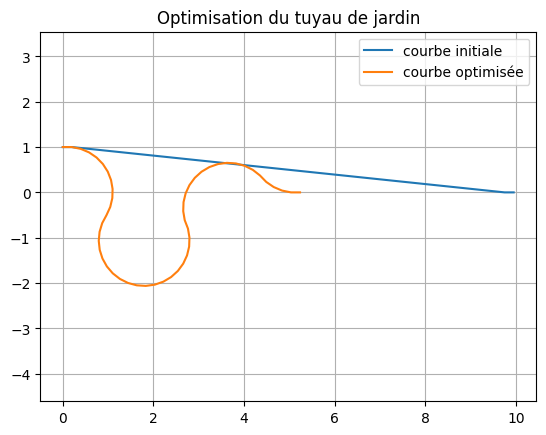

In [3]:
K = 5
N = 50
L = 10
ds = L/N
alpha = 1



x0 = np.zeros(N+1)
y0 = np.zeros(N+1)

y0[0] = 1
y0[N] = 0
x0[0] = 0
x0[N] = np.sqrt((L-2*ds)**2 -1) + 2*ds
x0[1:N] = np.linspace(ds, np.sqrt((L-2*ds)**2 -1) + ds, N-1)
y0[1:N] = np.linspace(1, 0, N-1)

theta0 = np.zeros(N)
theta0[0] = 0
theta0[-1] = 0
for i in range(1, N-1):
    theta0[i] = -np.arcsin(1 / (L - 2*ds))


# x0 = np.linspace(0, np.sqrt(L**2 -1), N+1)
# y0 = np.linspace(1, 0, N+1)

z0 = np.concatenate([x0, y0, np.abs(y0), theta0])

def f(z):
    s = 0
    theta = z[3*(N+1):]
    x = z[:N+1]
    y = z[N+1 : 2*(N+1)]
    w = z[2*(N+1):3*(N+1)]
    for i in range(N+1):
        s+= w[i]
    return K*(x[N]-L/2)**2 + ds*s


def c1e(z) :
    theta = z[3*(N+1):]
    x = z[:(N+1)]
    return x[0]
def c2e(z) :
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    return y[0] - 1
def c3e(z):
    theta = z[3*(N+1):]
    return theta[0]
def c4e(z):
    theta = z[3*(N+1):]
    return theta[N-1]
def c5e(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    return y[N] 
def c6e(z):
    theta = z[3*(N+1):]
    x = z[:(N+1)]
    cond = []
    for i in range(N):
        cond.append(x[i+1] - (x[i] + ds * np.cos(theta[i])))
    return cond
def c7e(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    cond = []
    for i in range(N):
        cond.append(y[i+1] - (y[i] + ds * np.sin(theta[i])))
    return cond
        


def ci_theta(z): #contrainte sur les angles theta
    theta = z[3*(N+1) :]
    contrainte = []
    for i in range(N-1):
        cond = alpha*ds - (theta[i+1] - theta[i])
        cond2 = alpha*ds + (theta[i+1] - theta[i])
        contrainte.append(cond)
        contrainte.append(cond2)
    return contrainte
def c1i(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    w = z[2*(N+1):3*(N+1)]
    return -(-w + y)
def c2i(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    w = z[2*(N+1):3*(N+1)]
    return (y + w)


z = optimize.minimize(f, z0, method='SLSQP',
                         constraints= [{"type": "ineq", "fun":c1i}, {"type": "ineq", "fun":c2i}, {"type": "ineq", "fun":ci_theta}, {"type": "eq", "fun":c1e}, {"type": "eq", "fun":c2e}, {"type": "eq", "fun":c3e}, {"type": "eq", "fun":c4e}, {"type": "eq", "fun":c5e}, {"type": "eq", "fun":c6e} , {"type": "eq", "fun":c7e}])
#print(z)

z_opt = z.x
x_opt = z_opt[:N+1]
y_opt = z_opt[N+1 : 2*(N+1)]

plt.plot(x0, y0, label='courbe initiale')
plt.plot(x_opt, y_opt, label='courbe optimisée')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.title("Optimisation du tuyau de jardin")
plt.show()


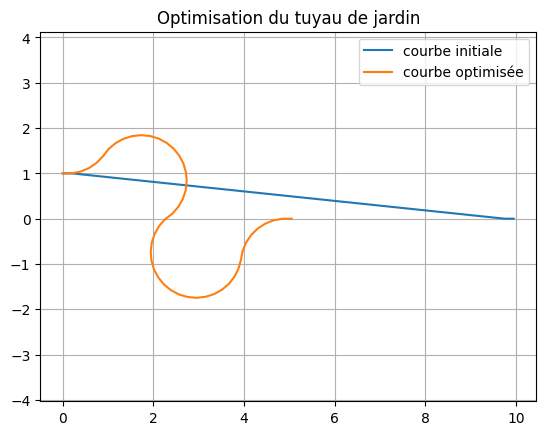

2.117639566057885


In [16]:
K = 10
N = 50
L = 10
ds = L/N
alpha = 1



x0 = np.zeros(N+1)
y0 = np.zeros(N+1)

y0[0] = 1
y0[N] = 0
x0[0] = 0
x0[N] = np.sqrt((L-2*ds)**2 -1) + 2*ds
x0[1:N] = np.linspace(ds, np.sqrt((L-2*ds)**2 -1) + ds, N-1)
y0[1:N] = np.linspace(1, 0, N-1)

theta0 = np.zeros(N)
theta0[0] = 0
theta0[-1] = 0
for i in range(1, N-1):
    theta0[i] = -np.arcsin(1 / (L - 2*ds))


# x0 = np.linspace(0, np.sqrt(L**2 -1), N+1)
# y0 = np.linspace(1, 0, N+1)

z0 = np.concatenate([x0, y0, np.abs(y0), theta0])

def f(z):
    s = 0
    theta = z[3*(N+1):]
    x = z[:N+1]
    y = z[N+1 : 2*(N+1)]
    w = z[2*(N+1):3*(N+1)]
    for i in range(N+1):
        s+= w[i]
    return K*(x[N]-L/2)**2 + ds*s


def c1e(z) :
    theta = z[3*(N+1):]
    x = z[:(N+1)]
    return x[0]
def c2e(z) :
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    return y[0] - 1
def c3e(z):
    theta = z[3*(N+1):]
    return theta[0]
def c4e(z):
    theta = z[3*(N+1):]
    return theta[N-1]
def c5e(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    return y[N] 
def c6e(z):
    theta = z[3*(N+1):]
    x = z[:(N+1)]
    cond = []
    for i in range(N):
        cond.append(x[i+1] - (x[i] + ds * np.cos(theta[i])))
    return cond
def c7e(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    cond = []
    for i in range(N):
        cond.append(y[i+1] - (y[i] + ds * np.sin(theta[i])))
    return cond
        


def ci_theta(z): #contrainte sur les angles theta
    theta = z[3*(N+1) :]
    contrainte = []
    for i in range(N-1):
        cond = alpha*ds - (theta[i+1] - theta[i])
        cond2 = alpha*ds + (theta[i+1] - theta[i])
        contrainte.append(cond)
        contrainte.append(cond2)
    return contrainte
def c1i(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    w = z[2*(N+1):3*(N+1)]
    return -(-w + y)
def c2i(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    w = z[2*(N+1):3*(N+1)]
    return (y + w)


z = optimize.minimize(f, z0, method='SLSQP',
                         constraints= [{"type": "ineq", "fun":c1i}, {"type": "ineq", "fun":c2i}, {"type": "ineq", "fun":ci_theta}, {"type": "eq", "fun":c1e}, {"type": "eq", "fun":c2e}, {"type": "eq", "fun":c3e}, {"type": "eq", "fun":c4e}, {"type": "eq", "fun":c5e}, {"type": "eq", "fun":c6e} , {"type": "eq", "fun":c7e}])
#print(z)

z_opt = z.x
x_opt = z_opt[:N+1]
y_opt = z_opt[N+1 : 2*(N+1)]

w = z_opt[2*(N+1):3*(N+1)]
s = 0
for i in range(N+1):
    s+=w[i]
Moy = ds**2 *s

plt.plot(x0, y0, label='courbe initiale')
plt.plot(x_opt, y_opt, label='courbe optimisée')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.title("Optimisation du tuyau de jardin")
plt.show()


print(Moy)

Le paramètre K agit comme une pondération de $$(x_N − \frac{L}{2})^2$$ dans l'expression de f.
Or f doit répondre à deux exigences : 
- minimiser $$K(x_N − \frac{L}{2})^2$$ qui correspond à minimiser la distance finale entre x et L/2, lieu du parterre de fleur, et 
- minimiser $$ds\sum_{i=0}^N{w_i}$$ qui correspond à un facteur près à la valeur moyenne des ordonnées. 

Ainsi, en augmentant K, on donne plus de poids à la première condition et ainsi, le $x_N$ de notre courbe optimisée se rapporche de plus en plus de L/2 à mesure qu'on augmente K, comme observé sur nos courbes (quitte à avoir une courbe moins centrée autour de y=0)

9. *Effet de* $N$. Pour $K = 10$, comparer les résultats de la question précédente à ceux obtenus pour
$N =70$ et $N =90$. Comparer également la valeur du terme $ds^2 \sum_{i=0}^N{w_i}$ à l’optimum dans chaque cas et interpréter.

***
**REPONSE**


***

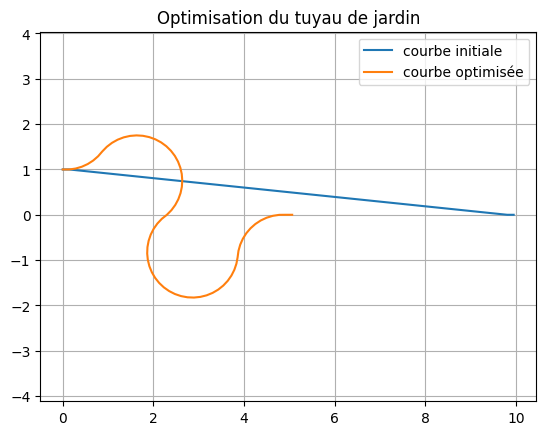

1.4940686352098744


In [ ]:
K = 10
N = 70
L = 10
ds = L/N
alpha = 1



x0 = np.zeros(N+1)
y0 = np.zeros(N+1)

y0[0] = 1
y0[N] = 0
x0[0] = 0
x0[N] = np.sqrt((L-2*ds)**2 -1) + 2*ds
x0[1:N] = np.linspace(ds, np.sqrt((L-2*ds)**2 -1) + ds, N-1)
y0[1:N] = np.linspace(1, 0, N-1)

theta0 = np.zeros(N)
theta0[0] = 0
theta0[-1] = 0
for i in range(1, N-1):
    theta0[i] = -np.arcsin(1 / (L - 2*ds))


# x0 = np.linspace(0, np.sqrt(L**2 -1), N+1)
# y0 = np.linspace(1, 0, N+1)

z0 = np.concatenate([x0, y0, np.abs(y0), theta0])

def f(z):
    s = 0
    theta = z[3*(N+1):]
    x = z[:N+1]
    y = z[N+1 : 2*(N+1)]
    w = z[2*(N+1):3*(N+1)]
    for i in range(N+1):
        s+= w[i]
    return K*(x[N]-L/2)**2 + ds*s


def c1e(z) :
    theta = z[3*(N+1):]
    x = z[:(N+1)]
    return x[0]
def c2e(z) :
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    return y[0] - 1
def c3e(z):
    theta = z[3*(N+1):]
    return theta[0]
def c4e(z):
    theta = z[3*(N+1):]
    return theta[N-1]
def c5e(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    return y[N] 
def c6e(z):
    theta = z[3*(N+1):]
    x = z[:(N+1)]
    cond = []
    for i in range(N):
        cond.append(x[i+1] - (x[i] + ds * np.cos(theta[i])))
    return cond
def c7e(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    cond = []
    for i in range(N):
        cond.append(y[i+1] - (y[i] + ds * np.sin(theta[i])))
    return cond
        


def ci_theta(z): #contrainte sur les angles theta
    theta = z[3*(N+1) :]
    contrainte = []
    for i in range(N-1):
        cond = alpha*ds - (theta[i+1] - theta[i])
        cond2 = alpha*ds + (theta[i+1] - theta[i])
        contrainte.append(cond)
        contrainte.append(cond2)
    return contrainte
def c1i(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    w = z[2*(N+1):3*(N+1)]
    return -(-w + y)
def c2i(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    w = z[2*(N+1):3*(N+1)]
    return (y + w)


z = optimize.minimize(f, z0, method='SLSQP',
                         constraints= [{"type": "ineq", "fun":c1i}, {"type": "ineq", "fun":c2i}, {"type": "ineq", "fun":ci_theta}, {"type": "eq", "fun":c1e}, {"type": "eq", "fun":c2e}, {"type": "eq", "fun":c3e}, {"type": "eq", "fun":c4e}, {"type": "eq", "fun":c5e}, {"type": "eq", "fun":c6e} , {"type": "eq", "fun":c7e}])
#print(z)

z_opt = z.x
x_opt = z_opt[:N+1]
y_opt = z_opt[N+1 : 2*(N+1)]

plt.plot(x0, y0, label='courbe initiale')
plt.plot(x_opt, y_opt, label='courbe optimisée')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.title("Optimisation du tuyau de jardin")
plt.show()

w = z_opt[2*(N+1):3*(N+1)]
s = 0
for i in range(N+1):
    s+=w[i]
Moy = ds**2 *s
print(Moy)


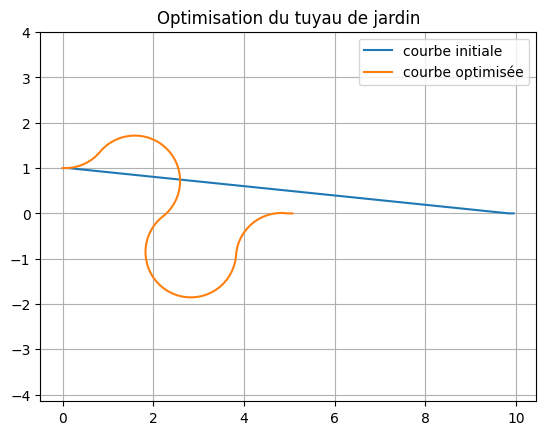

1.1540145721023307


In [17]:
K = 10
N = 90
L = 10
ds = L/N
alpha = 1



x0 = np.zeros(N+1)
y0 = np.zeros(N+1)

y0[0] = 1
y0[N] = 0
x0[0] = 0
x0[N] = np.sqrt((L-2*ds)**2 -1) + 2*ds
x0[1:N] = np.linspace(ds, np.sqrt((L-2*ds)**2 -1) + ds, N-1)
y0[1:N] = np.linspace(1, 0, N-1)

theta0 = np.zeros(N)
theta0[0] = 0
theta0[-1] = 0
for i in range(1, N-1):
    theta0[i] = -np.arcsin(1 / (L - 2*ds))


# x0 = np.linspace(0, np.sqrt(L**2 -1), N+1)
# y0 = np.linspace(1, 0, N+1)

z0 = np.concatenate([x0, y0, np.abs(y0), theta0])

def f(z):
    s = 0
    theta = z[3*(N+1):]
    x = z[:N+1]
    y = z[N+1 : 2*(N+1)]
    w = z[2*(N+1):3*(N+1)]
    for i in range(N+1):
        s+= w[i]
    return K*(x[N]-L/2)**2 + ds*s


def c1e(z) :
    theta = z[3*(N+1):]
    x = z[:(N+1)]
    return x[0]
def c2e(z) :
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    return y[0] - 1
def c3e(z):
    theta = z[3*(N+1):]
    return theta[0]
def c4e(z):
    theta = z[3*(N+1):]
    return theta[N-1]
def c5e(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    return y[N] 
def c6e(z):
    theta = z[3*(N+1):]
    x = z[:(N+1)]
    cond = []
    for i in range(N):
        cond.append(x[i+1] - (x[i] + ds * np.cos(theta[i])))
    return cond
def c7e(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    cond = []
    for i in range(N):
        cond.append(y[i+1] - (y[i] + ds * np.sin(theta[i])))
    return cond
        


def ci_theta(z): #contrainte sur les angles theta
    theta = z[3*(N+1) :]
    contrainte = []
    for i in range(N-1):
        cond = alpha*ds - (theta[i+1] - theta[i])
        cond2 = alpha*ds + (theta[i+1] - theta[i])
        contrainte.append(cond)
        contrainte.append(cond2)
    return contrainte
def c1i(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    w = z[2*(N+1):3*(N+1)]
    return -(-w + y)
def c2i(z):
    theta = z[3*(N+1):]
    y = z[(N+1):2*(N+1)]
    w = z[2*(N+1):3*(N+1)]
    return (y + w)


z = optimize.minimize(f, z0, method='SLSQP',
                         constraints= [{"type": "ineq", "fun":c1i}, {"type": "ineq", "fun":c2i}, {"type": "ineq", "fun":ci_theta}, {"type": "eq", "fun":c1e}, {"type": "eq", "fun":c2e}, {"type": "eq", "fun":c3e}, {"type": "eq", "fun":c4e}, {"type": "eq", "fun":c5e}, {"type": "eq", "fun":c6e} , {"type": "eq", "fun":c7e}])
#print(z)

z_opt = z.x
x_opt = z_opt[:N+1]
y_opt = z_opt[N+1 : 2*(N+1)]

plt.plot(x0, y0, label='courbe initiale')
plt.plot(x_opt, y_opt, label='courbe optimisée')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.title("Optimisation du tuyau de jardin")
plt.show()

w = z_opt[2*(N+1):3*(N+1)]
s = 0
for i in range(N+1):
    s+=w[i]
Moy = ds**2 *s
print(Moy)


On obtient comme valeur de la quantité $$ds^2 \sum_{i=0}^N{w_i}$$ 
Pour K = 10
Pour N = 50 :

                        2.12

Pour N = 70

                        1.49

Pour N = 90

                        1.15

Ainsi, plus la valeur de N est grande, plus notre quantité à minimisée est faible : on en déduit que plus on prend de points, plus notre optimisation est efficace car la dispersion des valeurs de wi dans le sens vertical est plus faible. En effet, on observe sur les tracés que la courbe semble se "tasser" alors que les rayons des arc de cercle s'élargissent. 

10. Choix de la valeur initiale. On considère la nouvelle valeur initiale représentée ci-contre. Préciser quelle est la valeur de $\beta$ qui permet de satisfaire toutes les contraintes du problème. Pour $N =50$ et $K =10$, comparer les résultats obtenus avec cette condition initiale aux précédents.
Quelle est la caractéristique du problème qui explique les résultats obtenus? A quoi est-elle due?

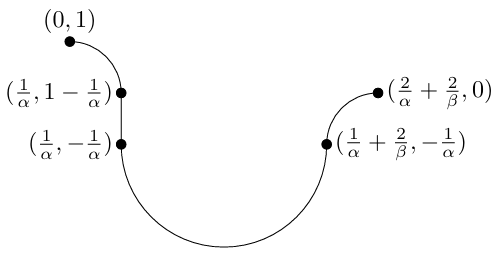

***
**REPONSE**

Si $r_1 = \frac{1}{\alpha}$ et $r_2= \frac{1}{\beta}$ sont les rayons des arcs de cercle, on a besoin d'une longueur totale $L = \pi r_1+1+\pi r_2$ donc
$$\beta = \frac{\alpha \ \pi}{\alpha (L-1)- \pi}$$

Il faut egalement verifier que $| \theta_i| \leq \alpha \ ds$
***

***
**REPONSE FAUSSE (j'avais r compris)**

On note  d'abord qu'il faut $\theta_0 = \theta_{N-1} = 0$.
On prendra donc des petits arcs de cercle de rayon $r_1 = \frac{1}{\alpha}-ds$

On a défini $L = \frac{1}{\alpha}+ \frac{1}{\beta}$ donc
$$ds = \frac{1}{\alpha N}+ \frac{1}{\beta N}$$

- La premiere condition sur $ds$ est : "Il faut un nombre entier de points entre $(0,\ 1)$ et $(\frac{1}{\alpha},\ 1- \frac{1}{\alpha})$ "


Pour un polygone régulier on a : 
$$r_1 = \frac{ds}{2\ sin(\frac{\pi}{N_1})}$$
Ou $r_1$ est le rayon du polygone, $ds$ la taille d'un coté et $N_1$ est le nombre de sommets du polygone.

Ici, on impose $N_1=4k_1$, ou $k_1 \in \mathbb{N}$ puisqu'on travaille sur un quart de cercle.

La premiere condition s'ecrit : 
$$ \exists k_1 \in \mathbb{N}, \quad ds = 2\ r_1\ sin(\frac{\pi}{4k_1}) \qquad (C_1)$$

- La deuxieme condition sur $ds$ est : "Il faut un nombre entier de points entre $(\frac{1}{\alpha},\ 1- \frac{1}{\alpha})$ et $(\frac{1}{\alpha},\ \frac{1}{\alpha})$ "

Ce qui s'ecrit :
$$ \exists k_2 \in \mathbb{N}, \quad ds = \frac{1}{k_2} \qquad (C_2)$$

***

In [ ]:
N = 50
K = 10
alpha = 1
L = 20

beta = alpha/(alpha*L-1)
ds = L/N

M = [np.array([0,1])]
dist1 = np.pi/2*1/alpha

curve1 = [np.cos(range()),np.sin()]

## 3) Ajout d'obstacles

On considère maintenant le fait que le tuyau ne peut traverser d’autres parterres de fleur circulaires situés à proximité du tuyau, afin de ne pas les abîmer. Pour $N_P$ parterres, ceci se traduit par la condition 
$$(x-x_{P,j})^2 +(y-y_{P,j})^2 \geq R_j^2, \qquad j =1,..., N_P \qquad (8)$$

11. Ajouter cette contrainte au problème nominal. Modifie-t-elle la caractéristique identifiée à la question précédente?

***
**REPONSE**


***

12.  Reprendre les simulations de la question 10 avec les valeurs $(x_{P1},\ y_{P1}) = (2,\ 1), (x_{P2},\ y_{P2}) = (3,\ 1) et $R1 = R2 =05$. Commenter.

***
**REPONSE**


***

## 4) Minimum global

On se propose de mettre en place une génération aléatoire de conditions initiales. Pour ce faire, on modifie la fonction objectif comme suit
$$K_1(x_N - \frac{L}{2})^2+K_2y_N^2 +ds \sum_{i=0}^N{w_i} \qquad (9)$$

où $K_1, K_2 \gg 1$ sont de grands paramètres constants, et où l’on ne considère plus la contrainte $y_N = 0$.


13. Justifier ce choix.

***
**REPONSE**


***

14. Proposer un algorithme visant à obtenir le minimum global de cette fonction, en générant des conditions initiales aléatoires mais satisfaisant les contraintes et l’implémenter.

***
**REPONSE**


***